# Vacation search results
Query ”vacation” at Google’s trends website for Poland, United, States, and United Kingdom. Download search
results from 2004 to the present day. Import csv files. Perform the following tasks

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_folder = 'VacationData/'
country_dict = {
    'US': pd.read_csv(f'{data_folder}vacationUS.csv'),
    'UK': pd.read_csv(f'{data_folder}vacationUK.csv'),
    'PL': pd.read_csv(f'{data_folder}vacationPL.csv')
}

In [3]:
country_dict['US'].head()

,Month,vacation: (United States)
0,2004-01,98
1,2004-02,89
2,2004-03,80
3,2004-04,78
4,2004-05,85


* Set datetime index for each dataframe

In [4]:
for dataframe in country_dict.values():
    dataframe.set_index('Month', inplace=True)

country_dict['US'].head()

,vacation: (United States)
Month,
2004-01,98
2004-02,89
2004-03,80
2004-04,78
2004-05,85


* Rename columns using country codes (eg. PL) as headers.

In [5]:
for country_code, country_name in zip(['PL', 'UK', 'US'], ['Poland', 'United Kingdom', 'United States']):
    country_dict[country_code].rename(columns={f'vacation: ({country_name})': country_code}, inplace=True)

country_dict['US'].head()

,US
Month,
2004-01,98
2004-02,89
2004-03,80
2004-04,78
2004-05,85


In [6]:
country_dict['UK'].head()

,UK
Month,
2004-01,41
2004-02,38
2004-03,43
2004-04,36
2004-05,38


In [7]:
country_dict['PL'].head()

,PL
Month,
2004-01,0
2004-02,100
2004-03,0
2004-04,0
2004-05,0


* Combine the search counts in one dataframe.

In [8]:
country_df = pd.concat([country_dict[code] for code in country_dict.keys()], axis=1)
country_df.head()

,US,UK,PL
Month,,,
2004-01,98,41,0
2004-02,89,38,100
2004-03,80,43,0
2004-04,78,36,0
2004-05,85,38,0


* Present the time series for all countries in one plot.

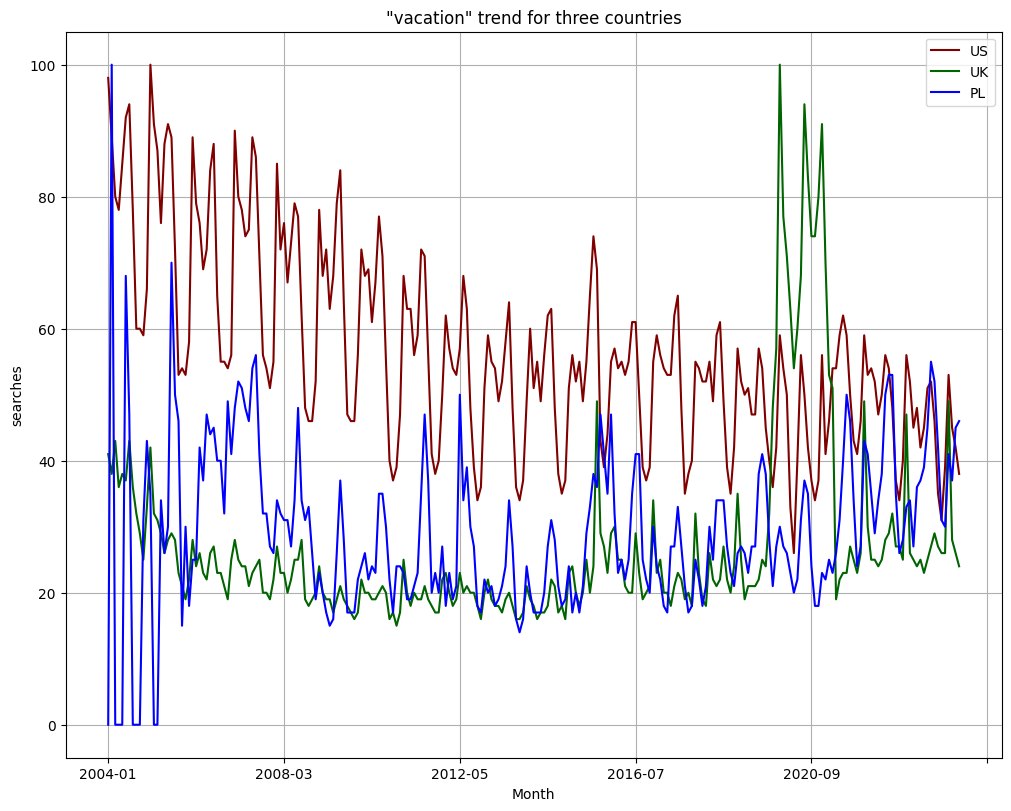

In [9]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(10, 8))
colors = ['maroon', 'darkgreen', 'blue']
country_df.plot(kind='line', ax=axes, grid=True)
axes.set(title='"vacation" trend for three countries', ylabel='searches')
for line, color in zip(axes.get_lines(), colors):
    line.set_color(color)
axes.legend()

* Generate descriptive statistics.

In [10]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 2004-01 to 2024-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   US      243 non-null    int64
 1   UK      243 non-null    int64
 2   PL      243 non-null    int64
dtypes: int64(3)
memory usage: 7.6+ KB


In [11]:
country_df.describe()

,US,UK,PL
count,243.000000,243.000000,243.000000
mean,56.609053,27.012346,29.308642
std,14.915168,14.272867,12.725625
min,26.000000,15.000000,0.000000
25%,47.000000,20.000000,21.000000
50%,54.000000,23.000000,27.000000
75%,64.000000,27.000000,35.500000
max,100.000000,100.000000,100.000000


* Show three histograms in one plot

[Text(0.5, 1.0, '"vacation" trend histogram for three countries'),
 Text(0.5, 0, 'trends')]

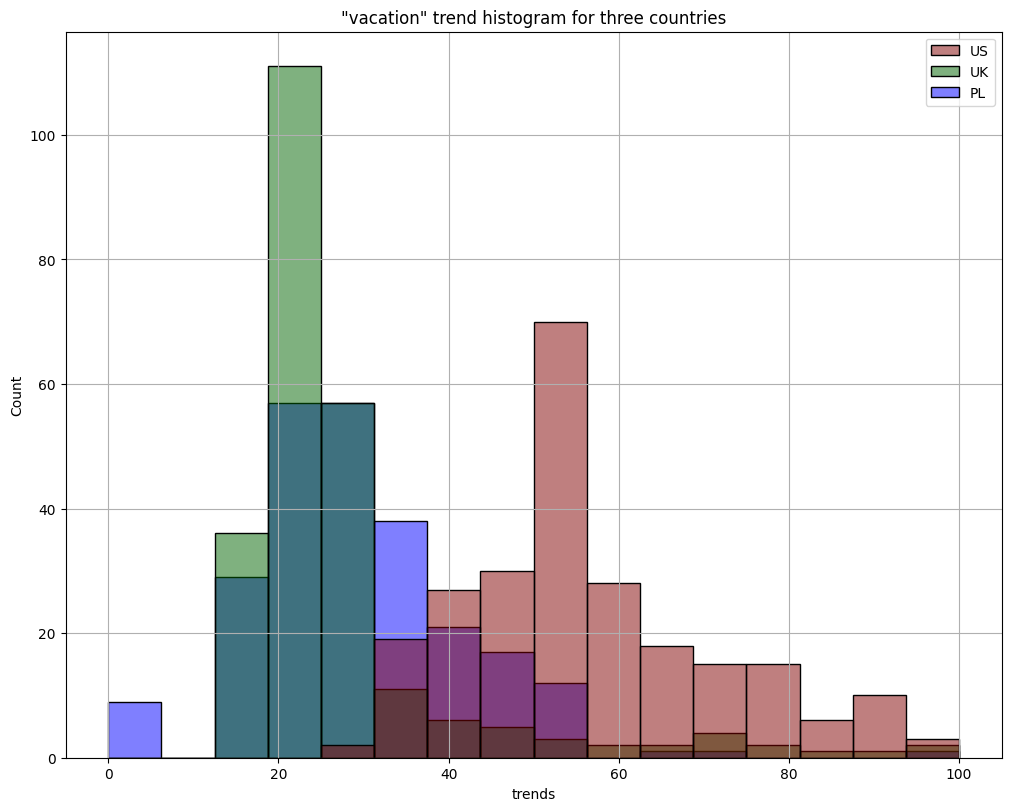

In [12]:
figure2, axes2 = plt.subplots(1, 1, layout='constrained', figsize=(10, 8))
axes2.grid(zorder=1)
sns.histplot(data=country_df, palette=colors, ax=axes2, alpha=0.5)
axes2.set(title='"vacation" trend histogram for three countries', xlabel='trends')

* Show three kernel densities in one plot.

<Axes: ylabel='Density'>

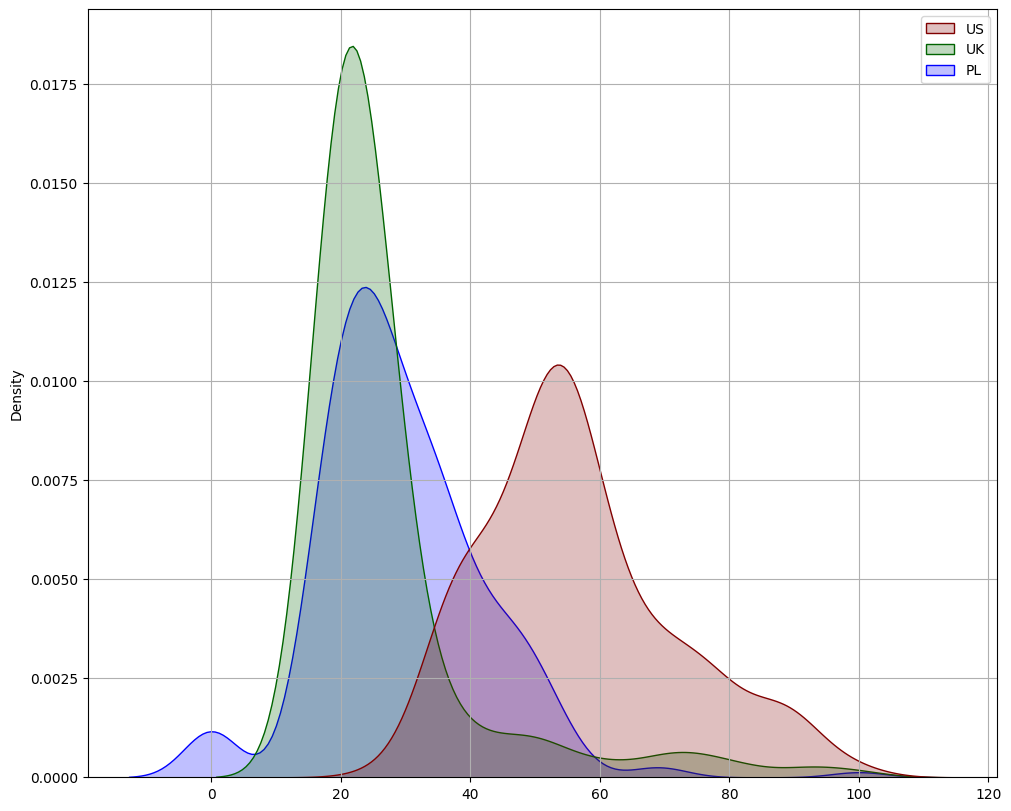

In [13]:
figure3, axes3 = plt.subplots(1, 1, layout='constrained', figsize=(10, 8))
axes3.grid(zorder=1)
sns.kdeplot(data=country_df, palette=colors, ax=axes3, fill=True)